# **Семинар 10. Практика. Линейная регрессия**

#### <i>Малкова Ксения, Преподаватель ФКН НИУ ВШЭ, kemalkova@hse.ru</i>

Работаем с датасетом по игрокам **FIFA23** [FIFA2023_el.csv](https://github.com/ksumarshmallow/Data-Analysis-Media-24/blob/main/data/FIFA2023_el.csv)

- `Full name` - полное имя
- `Value(in Euro)` - стоимость игрока (млн. евро)
- `Overall` - общий рейтинг игрока
- `Reactions` - оценка реакции игрока
- `Dribbling Total` - оценка владения мячом
- `Passing Total` - оценка количества и точности передач
- `Positions Played` - позиция на которой чаще всего играет футболист (фактическая)
- `Best Position` - позиция на которой у игрока наилучшие показатели
- `Nationality` - национальность игрока
- `Club Name` - клуб за который играет футболист
- `Position check` - если Positions Played совпадает с Best Position, то 1, иначе 0 

In [1]:
import pandas as pd
data = pd.read_csv('FIFA2023.csv')
data.head()

,Full Name,Value(in Euro),Overall,Reactions,Dribbling Total,Passing Total,Positions Played,Best Position,Nationality,Club Name
0,Lionel Messi,54000000,91,92,94,90,RW,CAM,Argentina,Paris Saint-Germain
1,Karim Benzema,64000000,91,92,87,83,"CF,ST",CF,France,Real Madrid CF
2,Robert Lewandowski,84000000,91,93,86,79,ST,ST,Poland,FC Barcelona
3,Kevin De Bruyne,107500000,91,91,87,93,"CM,CAM",CM,Belgium,Manchester City
4,Kylian Mbappé,190500000,91,93,92,80,"ST,LW",ST,France,Paris Saint-Germain


## Задание 1
Создайте в данных новый признак `Position check`, который будет возвращать 1, если значение из столбца `Positions Played` совпадет со значением `Best Position`. В ответ впишите среднее по новому признаку. Ответ округлите до двух знаков.

In [2]:
data['Position check'] = (data['Positions Played'] == data['Best Position']).astype(int)
data['Position check'].mean().round(2)

np.float64(0.42)

## Задание 2
Постройте корреляционную матрицу по числовым данным. Определите, между какими признаками существует **мультиколлинеарность** (значение корреляции более 0.7). Из каждой найденной мультиколлинеарной пары выберите тот показатель, который имеет наиболее сильную линейную взаимосвязь с признаком `Value(in Euro)`. Отметьте их. 

- Overall
- Reactions
- Dribbling Total
- Passing Total

In [3]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,Value(in Euro),Overall,Reactions,Dribbling Total,Passing Total,Position check
Value(in Euro),1.000000,0.561642,0.498667,0.406424,0.399985,-0.026051
Overall,0.561642,1.000000,0.872789,0.674971,0.699315,-0.053152
Reactions,0.498667,0.872789,1.000000,0.589903,0.615912,-0.083064
Dribbling Total,0.406424,0.674971,0.589903,1.000000,0.842927,-0.280647
Passing Total,0.399985,0.699315,0.615912,0.842927,1.000000,-0.280297
Position check,-0.026051,-0.053152,-0.083064,-0.280647,-0.280297,1.000000


## Задание 3
Мы хотим построить линейную регрессиию, которая будет предсказывать, как различные факторы влияют на стоимость игрока: 
$$\text{Value} = w_0 + w_1 \cdot \text{Overall} + w_2 \cdot \text{Dribbling Total} + w_3 \cdot \text{Position check}$$

Соотнесите составляющие модели и термины регрессии (**(a)** Предикторы/Независимые переменные, **(b)** Наблюдение, **(c)** Параметры регрессии, **(d)** Целевая/Зависимая переменная). 
1. Overall,  Dribbling Total, Position check	
2. $w_0$, $w_1$, $w_2$, $w_3$
3. Value
4. Футболист

## Задание 4
Обучите модель из прошлого задания и заполните пропуски в уравнении регрессии по получившимся результатам. Ответы округлите до двух знаков. Разделитель точка. 

$$\text{Value} = w_0 + w_1 \cdot \text{Overall} + w_2 \cdot \text{Dribbling Total} + w_3 \cdot \text{Position check}$$

In [4]:
import statsmodels.api as sm

In [5]:
X = data[['Overall', 'Dribbling Total', 'Position check']]
Y = data['Value(in Euro)']

# добавляем константный столбец - для оценки независимого коэффициента
X = sm.add_constant(X)

# инициализируем модель линейной регрессии и ищем ее параметры (обучаем ~ fit)
model = sm.OLS(Y, X).fit()

# смотрим на ее параметры 
model.params.round(2)

const             -39007456.25
Overall              588481.82
Dribbling Total       47723.51
Position check       280356.30
dtype: float64

## Задание 5
Выберите верные утверждения про интерпретацию полученной регрессии
- При увеличении общего рейтинга игрока на 1 пункт стоимость игрока возрастает в 588481.82 раз
- Если фактическая позиция игрока не совпадает с лучшей, то это увеличивает его стоимость на 280356.3 евро
- Если оценка владения мячом увеличится на 1 пункт, это увеличит показатель общего рейтинга на 47723.51 евро
- При увеличении общего рейтинга игрока на 1% стоимость игрока возрастает на 588481.82 евро
- При увеличении общего рейтинга игрока на 1 пункт стоимость игрока возрастает на 588481.82 евро

## Задание 6
Посчитайте среднеабсолютную ошибку. Ответ округлите до двух знаков.
$$MAE = \frac{\sum |y - \hat{y}|}{n}$$

$\hat{y}$ - Предсказанные моделью значения целевой переменной

In [8]:
Y_hat = model.predict(X)

MAE = sum(abs(Y - Y_hat)) / Y.shape[0]
round(MAE, 2)

3158747.02

## Задание 7
Посчитайте среднеквадратичную ошибку модели. Ответ округлите до двух знаков.
$$MSE = \frac{\sum (y - \hat{y})^2}{n}$$

$\hat{y}$ - Предсказанные моделью значения целевой переменной

In [9]:
MSE = sum((Y - Y_hat)**2) / Y.shape[0]
MSE

39807288782424.73

## Задание 8
Рассчитайте коэффициент детерминации модели. Ответ округлите до двух знаков.

In [11]:
model.rsquared.round(2)

np.float64(0.32)

## Задание 9
Какая из гистограмм соответствует признаку `Value(in Euro)`

![[image]](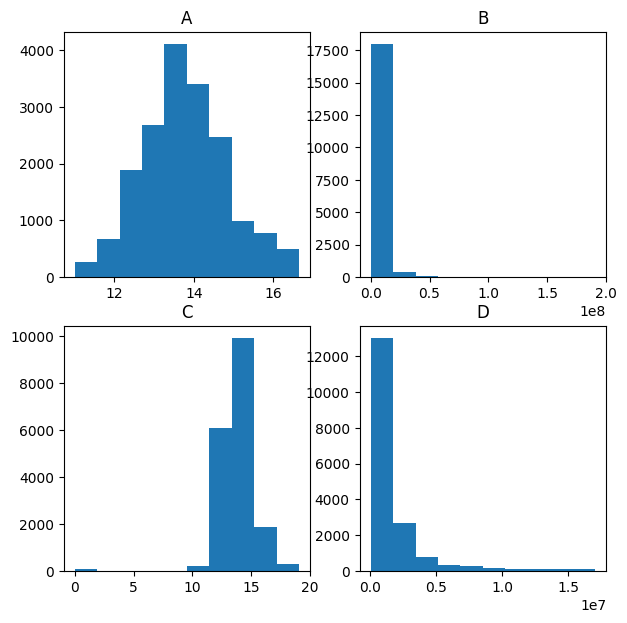)

<Axes: ylabel='Frequency'>

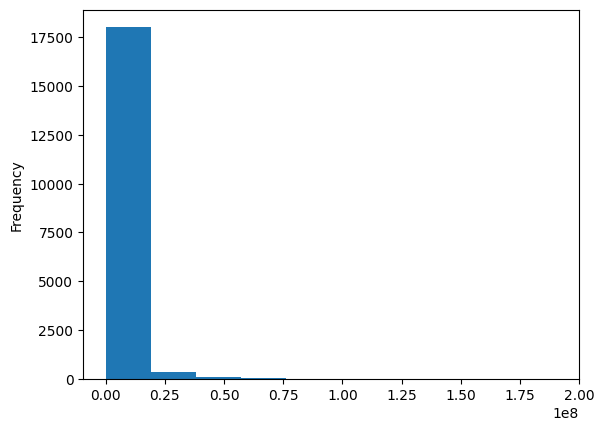

In [12]:
data['Value(in Euro)'].plot(kind='hist')

## Задание 10
Создайте новый признак `log_Value`, который будет представлять из себя натуральный логорифм признака `Value(in Euro) + 1`.

```python
np.log(признак+1)
```

Отметьте, какая из гистограмм соответствует новому признаку. 

![[image]](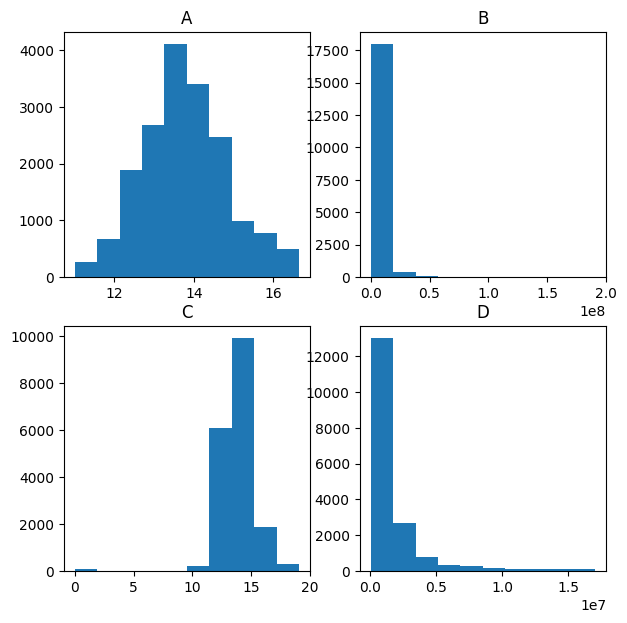)

<Axes: ylabel='Frequency'>

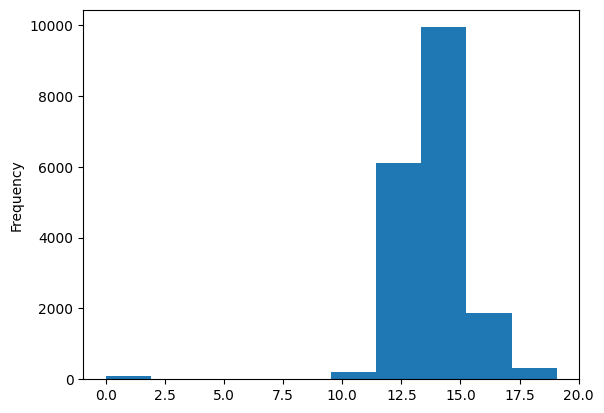

In [31]:
import numpy as np
data['log_Value'] = np.log(1 + data['Value(in Euro)'])

data['log_Value'].plot(kind='hist')

## Задание 11
Будем считать, что выбросами по признаку `log_Value` считаются наблюдения, которые больше, чем $1.5 \cdot IQR$. В ответ впишите, сколько наблюдений останется в данных после удаления выбросов.

*Получившийся датасет сохраните в новую переменную. Далее мы будем работать с ним.*

In [32]:
iqr_log_value = data['log_Value'].quantile(0.75) - data['log_Value'].quantile(0.25)
left_border = data['log_Value'].quantile(0.25) - 1.5 * iqr_log_value
right_border = data['log_Value'].quantile(0.75) + 1.5 * iqr_log_value

data_filt = data[(data['log_Value'] > left_border) & (data['log_Value'] < right_border)]
data_filt.shape

(17763, 12)

## Задание 12
Отметьте, какая из гистограмм соответствует признаку `log_Value` после удаления выбросов. 

![[image]](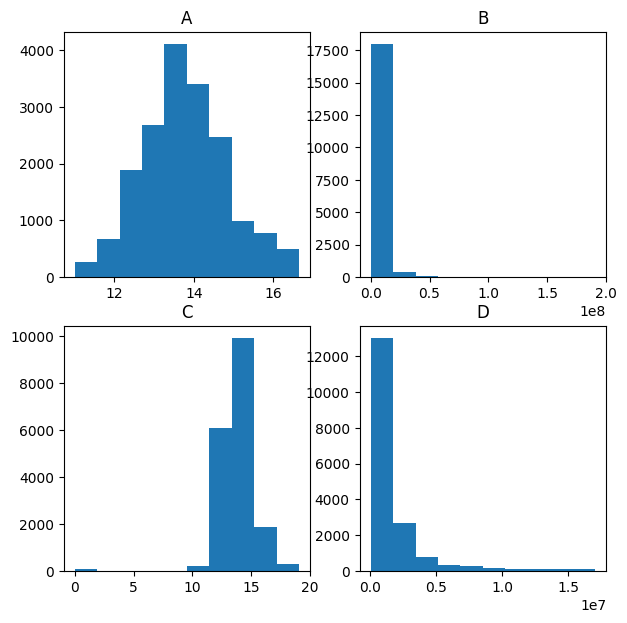)

<Axes: ylabel='Frequency'>

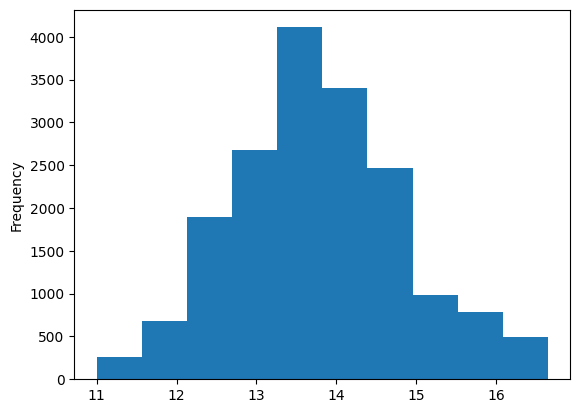

In [33]:
data_filt['log_Value'].plot(kind='hist')

In [42]:
data_filt.shape

(17763, 12)

## Задание 13
Постройте линейную регрессиию, которая будет предсказывать, как различные факторы влияют на логарифм стоимости игрока: 

$$ln(\text{Value}+1) = w_0 + w_1 \cdot \text{Overall} + w_2 \cdot \text{Dribbling Total} + w_3 \cdot \text{Position check}$$

Укажите показатели качества модели ($R^2$, $MAE$, $MSE$). Ответы округлите до двух знаков. 

In [45]:
X = sm.add_constant(data_filt[['Overall', 'Dribbling Total', 'Position check']])
Y = data_filt['log_Value']

model = sm.OLS(Y, X).fit()

Y_pred = model.predict(X)

MSE = ((Y-Y_pred)**2).mean()
MAE = (abs(Y-Y_pred)).mean()
R2 = model.rsquared

print(f"""R2: {R2:.2f}
MSE: {MSE:.2f}
MAE: {MAE:.2f}
""")

R2: 0.75
MSE: 0.28
MAE: 0.40



## Задание 14
Составьте полученное уравнение регрессии. Ответы округлите до двух знаков. Разделитель точка. 

$$ln(\text{Value}+1) = w_1 \cdot \text{Position check} + w_2 \cdot \text{Overall} + w_3 \cdot \text{Dribbling Total} + w_0$$

In [54]:
model.params

const              4.221551
Overall            0.141263
Dribbling Total    0.006337
Position check    -0.134866
dtype: float64

## Задание 15
Определите, какие коэффициенты являются значимыми в полученной регрессии

```python
model.pvalues
```

- Константа
- Параметр Overall
- Параметр Dribbling Total
- Position_check

In [55]:
model.pvalues

const              0.000000e+00
Overall            0.000000e+00
Dribbling Total    2.151208e-25
Position check     2.262057e-56
dtype: float64

## Задание 16
Выберите верные утверждения про интерпретацию уравнения регрессии из Задания 14:
- Если рейтинг футболиста, оценка его владением мячом равны 0, а лучшая позиция не совпадает с фактической, то его стоимость будет составлять примерно 68 евро
- Если лучшая позиция совпадает с фактической, то это снижает показатель владения мячом на 0.13
- При увеличении общего рейтинга на 1 пункт,  стоимость увеличивается на 0.15%
- При улучшении показателей владения мячом на 2 пункта логарифм стоимости вырастет на 0.02
- MSE этой модели меньше, чем у модели, построенной в Задании 4. Следовательно, модель из Задания 4 более высокого качества
- R2 этой модели больше, чем у модели, построенной в Задании 4. Следовательно, модель из Задания 4 более низкого качества
- MAE этой модели меньше, чем MSE модели из Задания 4. Следовательно, эта модель более высокого качества